In [2]:
# GPU TEST

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))    

Found GPU at: /device:GPU:0


In [3]:
# Importing libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

import pickle
import gzip
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [4]:
# Loading Dataset

with open('RML2016.10b.dat','rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()

In [5]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], p.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(p[mod,snr])
        for i in range(p[(mod,snr)].shape[0]): lbl.append((mod,snr))
X = np.vstack(X)
print(X.shape)
print('One Sample : ')
print(X[1])

(1200000, 2, 128)
One Sample : 
[[-4.19708574e-03 -1.05328131e-02 -6.80017332e-03 -9.91973188e-03
  -1.03938682e-02  7.35921273e-03 -5.79270255e-03  8.75316327e-04
   5.74485445e-03  3.80687695e-03  4.48161503e-03  2.23256741e-03
  -5.08088525e-03  1.14897033e-02  3.69756296e-03 -3.73764057e-03
   8.45446717e-03  1.06125823e-04  3.77813447e-03 -9.91978013e-05
   4.88965027e-03 -1.20170210e-02 -7.52351992e-03 -4.15276550e-03
  -6.09601848e-04 -7.63792731e-03  1.80396833e-03 -4.27807216e-03
  -6.04987657e-03 -4.59751755e-05 -2.64867861e-03 -7.26473983e-03
  -7.43488828e-03 -6.65675325e-04  9.14319977e-03 -2.39192718e-03
   1.03462160e-04 -2.56249658e-03 -1.09164175e-02  5.64304087e-03
  -5.38121350e-03  5.24967397e-03  6.68406626e-03  5.84752206e-03
  -7.79488217e-03  3.29229305e-03 -3.62416543e-03 -5.62080089e-03
  -3.07036750e-03  1.65742426e-03 -6.43748150e-04 -6.47912035e-03
   3.29789333e-03  1.00365262e-02  3.98667529e-04 -9.42931324e-03
   2.35072733e-03  1.36975560e-03  8.0092307

In [6]:
X

array([[[ 0.00907056,  0.00599482, -0.0035653 , ..., -0.00235585,
         -0.0008447 ,  0.00397915],
        [-0.0005109 ,  0.00754676,  0.00611815, ..., -0.00607358,
         -0.0072575 , -0.00728448]],

       [[-0.00419709, -0.01053281, -0.00680017, ..., -0.00901077,
         -0.00263061, -0.00519594],
        [ 0.0089433 , -0.00966051,  0.00101369, ...,  0.00162549,
         -0.00118617,  0.005617  ]],

       [[ 0.00174664, -0.0084256 ,  0.00147178, ..., -0.00643154,
          0.00503035,  0.02152551],
        [-0.00100279, -0.00339724, -0.00072322, ...,  0.00198796,
         -0.00023271,  0.00323295]],

       ...,

       [[ 0.0027236 ,  0.00265014,  0.00258855, ...,  0.00280217,
          0.00278396,  0.00279103],
        [-0.00729888, -0.00731881, -0.00735847, ..., -0.00736364,
         -0.00733167, -0.00727415]],

       [[ 0.00396798,  0.00391821,  0.00399417, ...,  0.00398769,
          0.00400097,  0.00397493],
        [-0.0067528 , -0.00674574, -0.00678544, ..., -0.00657

In [7]:
print('keys:')
print(p.keys())

keys:
dict_keys([('QPSK', 2), ('PAM4', 8), ('AM-DSB', -4), ('GFSK', 6), ('QAM64', 8), ('PAM4', 18), ('QAM64', -6), ('QAM16', 2), ('QAM16', -20), ('8PSK', -18), ('PAM4', -6), ('WBFM', -18), ('BPSK', 8), ('CPFSK', 10), ('WBFM', 6), ('BPSK', 4), ('BPSK', -2), ('QPSK', -20), ('CPFSK', -8), ('QAM64', -20), ('QAM16', 12), ('GFSK', -20), ('CPFSK', 0), ('AM-DSB', 6), ('BPSK', -16), ('QPSK', -6), ('8PSK', -12), ('CPFSK', -18), ('AM-DSB', -18), ('QPSK', 8), ('PAM4', 14), ('WBFM', -8), ('AM-DSB', -10), ('GFSK', 12), ('QAM64', 2), ('8PSK', -10), ('QAM64', -4), ('GFSK', -4), ('AM-DSB', 8), ('PAM4', -16), ('QPSK', -16), ('BPSK', 16), ('WBFM', -14), ('CPFSK', 16), ('WBFM', 0), ('QPSK', 6), ('BPSK', 14), ('AM-DSB', -8), ('GFSK', -10), ('CPFSK', -2), ('QAM16', 8), ('QAM16', 6), ('QAM16', -16), ('QAM64', 18), ('CPFSK', 6), ('BPSK', 0), ('BPSK', -6), ('8PSK', -14), ('CPFSK', -12), ('WBFM', 10), ('BPSK', -20), ('PAM4', 4), ('GFSK', 10), ('QAM16', -6), ('QAM64', 4), ('PAM4', -20), ('8PSK', 10), ('QAM64', -

In [8]:
label=[]
mod=[]
data=[]
for i in range(len(lbl)):
        label.append(lbl[i][0])
        mod.append(lbl[i][1])
        data.append(X[i])

data=pd.DataFrame([label,mod,data])
dataset = data.T
print(dataset)

            0    1                                                  2
0        8PSK  -20  [[0.009070556, 0.005994823, -0.0035653014, 0.0...
1        8PSK  -20  [[-0.0041970857, -0.010532813, -0.0068001733, ...
2        8PSK  -20  [[0.0017466361, -0.008425603, 0.0014717841, -0...
3        8PSK  -20  [[0.0033529082, -0.0025561908, 0.007650535, 0....
4        8PSK  -20  [[-0.00024625435, -0.0023730611, 0.0079680765,...
...       ...  ...                                                ...
1199995  WBFM   18  [[0.0014084066, 0.001435775, 0.0013789816, 0.0...
1199996  WBFM   18  [[0.0019846044, 0.0019507372, 0.0019910156, 0....
1199997  WBFM   18  [[0.0027236023, 0.0026501408, 0.002588551, 0.0...
1199998  WBFM   18  [[0.0039679757, 0.0039182063, 0.003994166, 0.0...
1199999  WBFM   18  [[0.0049285446, 0.0049247583, 0.0049735857, 0....

[1200000 rows x 3 columns]


In [9]:
X1 = dataset.iat[15280,2]

X1 = X1.flatten()
print(X.shape)

import matplotlib.pyplot as plt
# visualizing the results
plt.figure(figsize=(3,3))
plt.plot(X1[1:129], color = 'red', label = 'Dim-1')
plt.plot(X1[129:256], color = 'green', label = 'Dim-2')
plt.title("Signal energy diagram")
plt.xlabel('Time')
plt.ylabel('energy level')
plt.legend()

(1200000, 2, 128)


(1200000, 2, 128)


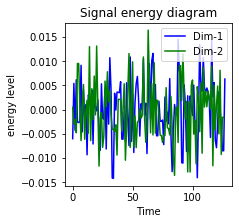

In [10]:
X1 = dataset.iat[14280,2]

X1 = X1.flatten()
print(X.shape)

import matplotlib.pyplot as plt
# visualizing the results
plt.figure(figsize=(3,3))
plt.plot(X1[1:129], color = 'blue', label = 'Dim-1')
plt.plot(X1[129:256], color = 'green', label = 'Dim-2')
plt.title("Signal energy diagram")
plt.xlabel('Time')
plt.ylabel('energy level')
plt.legend()

(1200000, 2, 128)


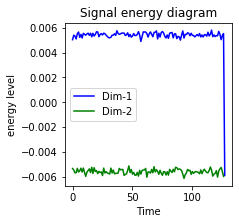

In [11]:
X1 = dataset.iat[219990,2]

X1 = X1.flatten()
print(X.shape)

import matplotlib.pyplot as plt
# visualizing the results
plt.figure(figsize=(3,3))
plt.plot(X1[1:129], color = 'blue', label = 'Dim-1')
plt.plot(X1[129:256], color = 'green', label = 'Dim-2')
plt.title("Signal energy diagram")
plt.xlabel('Time')
plt.ylabel('energy level')
plt.legend()

In [12]:
print('shape of all data : ')
print(X.shape)

shape of all data : 
(1200000, 2, 128)


In [13]:
shapes = []
snrs = []
mod_types = []
for x in p.keys():
    shapes.append(p[x].shape)
    snrs.append(x[1])
    mod_types.append(x[0])
print('Same distribution of number of samples as shown : ')
print(sorted(shapes)[0:20])
print(sorted(shapes)[20:40])
print(sorted(shapes)[40:60])

Same distribution of number of samples as shown : 
[(6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128)]
[(6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128)]
[(6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6000, 2, 128), (6

In [14]:
print("same modulation type but different SNRs:")
print(p["QPSK",-20].shape)
print(p["QPSK",-18].shape)
print(p["QPSK",-16].shape)
print(p["QPSK",-14].shape)
print(p["QPSK",-12].shape)
print(p["QPSK",-10].shape)
print(p["QPSK",-8].shape)
print(p["QPSK",-6].shape)
print(p["QPSK",-4].shape)
print(p["QPSK",-2].shape)
print(p["QPSK",0].shape)
print(p["QPSK",2].shape)
print(p["QPSK",4].shape)
print(p["QPSK",6].shape)
print(p["QPSK",8].shape)
print(p["QPSK",10].shape)
print(p["QPSK",12].shape)
print(p["QPSK",14].shape)
print(p["QPSK",16].shape)
print(p["QPSK",18].shape)

same modulation type but different SNRs:
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)
(6000, 2, 128)


In [15]:
import os,random
#os.environ["KERAS_BACKEND"] = "theano"
os.environ["KERAS_BACKEND"] = "tensorflow"
#os.environ["THEANO_FLAGS"]  = "device=cuda,floatX=float32"
import numpy as np
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, SeparableConv2D
from keras.regularizers import *
from keras.optimizers import adam
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, random, sys, keras

In [16]:

# Partition the data
#  into training and test sets of the form we can train/test on 
#  while keeping SNR and Mod labels handy for each
np.random.seed(2010)
n_examples = X.shape[0]
n_train = n_examples * 0.8
train_idx = np.random.choice(range(0,n_examples), size= int(n_train), replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
#changed from x to combined data
#X_train = combined_Data[train_idx]
#X_test =  combined_Data[test_idx]
X_train = X[train_idx]
X_test =  X[test_idx]

In [17]:
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1 
Y_train = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx)))
Y_test = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))

In [18]:
in_shp = list(X_train.shape[1:])
print (X_train.shape, in_shp)
classes = mods

(960000, 2, 128) [2, 128]


In [19]:
# Set up some params
nb_epoch = 100 # number of epochs to train on
batch_size = 500 # training batch size

In [20]:
import keras.models as models
# Build VT-CNN2 Neural Net model using Keras primitives --
# - Reshape [N,2,128] to [N,1,2,128] on input
# - Pass through 2 2DConv/ReLu layers
# - Pass through 2 Dense layers (ReLu and Softmax)
# - Perform categorical cross entropy optimization
drop_rate = 0.2 # dropout rate (%)
cnn = keras.models.Sequential()
cnn.add(Reshape(in_shp+[1], input_shape=in_shp))

cnn.add(ZeroPadding2D((0, 2)))
cnn.add(Conv2D(256, (1, 5),padding='valid', activation="relu", name="conv1",kernel_initializer='glorot_uniform',data_format="channels_last"))
cnn.add(Dropout(drop_rate))

cnn.add(ZeroPadding2D((0,2)))
cnn.add(Conv2D(96,(1, 3), padding='valid', activation="relu", name="conv2", kernel_initializer='glorot_uniform',data_format="channels_last"))
cnn.add(Dropout(drop_rate))

cnn.add(Conv2D(64,(2,31), padding='valid', activation="relu", name="conv3", kernel_initializer='glorot_uniform',data_format="channels_last"))
cnn.add(Dropout(drop_rate))

cnn.add(Conv2D(32,(1,51), padding='valid', activation="relu", name="conv4", kernel_initializer='glorot_uniform',data_format="channels_last"))
cnn.add(Dropout(drop_rate))
cnn.add(Flatten())

#cnn.add(GaussianNoise(0.0001))

cnn.add(Dense(1024, activation = 'relu', kernel_initializer = 'he_normal'))
cnn.add(Dense(256, activation = 'relu', kernel_initializer = 'he_normal'))
cnn.add(Dense(64, activation = 'relu', kernel_initializer = 'he_normal'))

cnn.add(Dense(len(classes), kernel_initializer = 'he_normal'))
cnn.add(Activation('softmax'))
cnn.add(Reshape([len(classes)]))
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 2, 128, 1)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 2, 132, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 2, 128, 256)       1536      
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 128, 256)       0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 2, 132, 256)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 2, 130, 96)        73824     
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 130, 96)       

In [ ]:
# perform training ...
#   - call the main training loop in keras for our network+dataset
filepath = 'convmod_SEP_CNN0b01_0.5.wts.h5'
HIS = cnn.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=2,
     validation_split=0.25,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
    ])
# we re-load the best weights once training is finished
cnn.load_weights(filepath)

In [ ]:
scscore = cnn.evaluate(X_test, Y_test, batch_size=batch_size)
print(cnn.metrics_names)
print (scscore)

In [ ]:
# Show loss curves 
plt.figure()
plt.title('Training performance')
plt.plot(HIS.epoch, HIS.history['loss'], label='train loss+error')
plt.plot(HIS.epoch, HIS.history['val_loss'], label='val_error')
plt.legend()

In [ ]:
plt.figure()
plt.title('Training performance')
plt.plot(HIS.epoch, HIS.history['accuracy'], label='train accuracy')
plt.plot(HIS.epoch, HIS.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Reds, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Plot confusion matrix
test_Y_hat = cnn.predict(X_test, batch_size=batch_size)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)
# on the right its a color chart to indicate that the darker the color the easier and thee most to identify

In [ ]:
# Plot confusion matrix
acc = {}
for snr in snrs:

    # extract classes @ SNR
    test_SNRs = list(map(lambda x: lbl[x][1], test_idx))
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]    

    # estimate classes
    test_Y_i_hat = cnn.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print ("Overall Accuracy: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

In [ ]:
# Plot accuracy curve
plt.plot(snrs, list(map(lambda x: acc[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("CNN2 Classification Accuracy on RadioML 2016.10 Alpha")